# Project Report: SPY Volatility Forecasting using GARCH

## By: Abhishek Patil


In [27]:
!pip install arch

# Load all the necessary Libraries:

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# SPY Volatility:

In [4]:
# Download AAPL data from 2010-01-01 to 2024-01-01
spy_data = yf.download('SPY', start='2010-01-01', end='2024-01-01')

# Print the last few rows of the data
spy_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,473.859985,475.380005,471.700012,473.649994,473.649994,67126600
2023-12-26,474.070007,476.579987,473.989990,475.649994,475.649994,55387000
2023-12-27,475.440002,476.660004,474.890015,476.510010,476.510010,68000300
2023-12-28,476.880005,477.549988,476.260010,476.690002,476.690002,77158100
2023-12-29,476.489990,477.029999,473.299988,475.309998,475.309998,122234100


# Calculating the Daily returns:

In [ ]:
#spy_data["Daily Returns"] = (spy_data["Close"].pct_change().dropna()) * 100

In [5]:
returns = 100 * spy_data.Close.pct_change().dropna()

In [6]:
spy_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129936,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360580,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422089,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791115,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083275,126402800


Text(0.5, 1.0, 'DIS Returns')

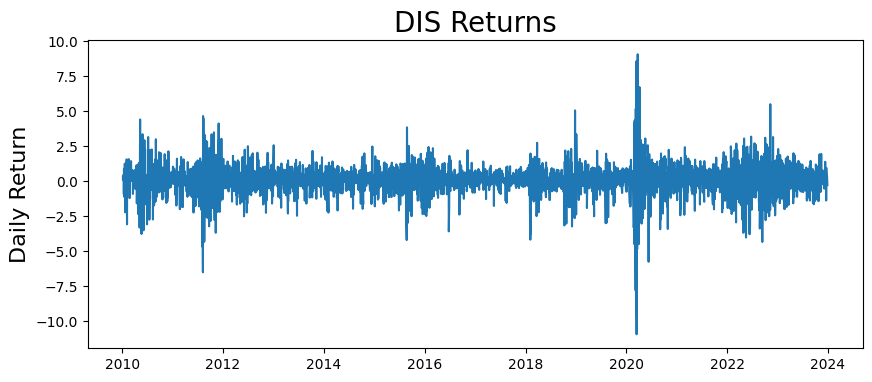

In [7]:
# Now lets plot the returns
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Daily Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

# PACF:

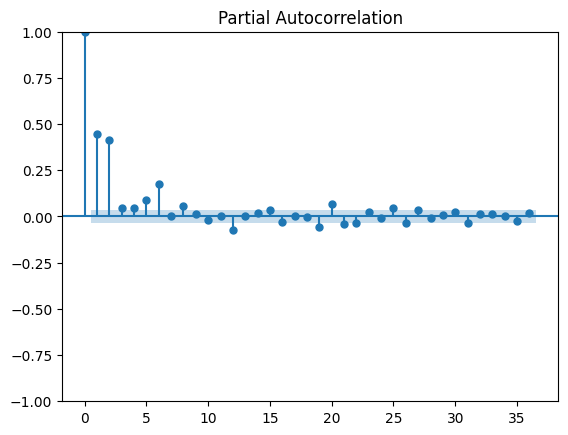

In [8]:
plot_pacf(returns**2)
plt.show()

# Theory of Garch Model:
##The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a statistical method commonly used in finance for forecasting volatility, which measures the degree of variation or dispersion in financial asset prices. Here's a simplified explanation of how the GARCH model works:

### 1. Understanding Volatility: In finance, volatility refers to the degree of variation in the price of a financial asset over time. High volatility indicates large price swings, while low volatility suggests relatively stable prices.

### 2. Autoregressive Nature: The GARCH model builds on the autoregressive concept, which means it considers the relationship between a variable and its own past values. In the case of volatility, it examines how past volatility levels affect future volatility.

### 3. Conditional Heteroskedasticity: The term "heteroskedasticity" refers to the phenomenon where the variance of a variable changes over time. In financial markets, volatility tends to exhibit this behavior, with periods of high and low volatility. "Conditional" heteroskedasticity means that the variance is dependent on past values of the series.

### 4. Model Components: The GARCH model consists of two main components:
#### A) Autoregressive Component (ARCH): This part captures the past squared residuals (errors) of the asset returns, indicating volatility clustering, where periods of high volatility tend to be followed by more high volatility.
#### B) Moving Average Component (GARCH): This component accounts for the lagged conditional variances, representing the persistence of volatility shocks over time.

### 5. Parameter Estimation: The GARCH model estimates parameters that describe the behavior of volatility over time. These parameters include the ARCH and GARCH terms, which determine the degree of persistence and volatility clustering in the data.

### 6. Forecasting: Once the model parameters are estimated, the GARCH model can be used to forecast future volatility based on past information. By analyzing historical volatility patterns, the model generates predictions about the future variability of asset prices.

## Example:
Suppose we want to forecast the volatility of a stock based on its historical daily returns. We collect data on the stock's returns over the past year and use a GARCH model to analyze the data. The model estimates parameters such as the ARCH and GARCH terms, which describe the past volatility patterns and their persistence. With these parameters, we can then predict the future volatility of the stock, helping investors assess the level of risk associated with holding the asset.


# Fit Garch(2,2):

In [9]:
model = arch_model(returns, p=2, q=2)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 33905.99923247029
Iteration:      2,   Func. Count:     20,   Neg. LLF: 16298.83024021532
Iteration:      3,   Func. Count:     32,   Neg. LLF: 6837.065143677712
Iteration:      4,   Func. Count:     41,   Neg. LLF: 6466.456770266234
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4733.958561512231
Iteration:      6,   Func. Count:     58,   Neg. LLF: 4619.797585026682
Iteration:      7,   Func. Count:     67,   Neg. LLF: 4535.103194796102
Iteration:      8,   Func. Count:     75,   Neg. LLF: 4541.062415575578
Iteration:      9,   Func. Count:     83,   Neg. LLF: 4533.6826278861945
Iteration:     10,   Func. Count:     91,   Neg. LLF: 4533.405589891328
Iteration:     11,   Func. Count:     98,   Neg. LLF: 4533.398341300197
Iteration:     12,   Func. Count:    105,   Neg. LLF: 4533.393414410276
Iteration:     13,   Func. Count:    112,   Neg. LLF: 4533.393154417841
Iteration:     14,   Func. Count:    119,   Neg. LLF: 4533.3931

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4533.39
Distribution:                  Normal   AIC:                           9078.79
Method:            Maximum Likelihood   BIC:                           9115.79
                                        No. Observations:                 3521
Date:                Fri, Mar 01 2024   Df Residuals:                     3520
Time:                        00:23:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0801  1.262e-02      6.348  2.187e-10 [5.537e-02,  0.105]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0622  1.541e-02      4.034  5.483e-05 [3.196e-02,9.235e-02]
alpha[1]       0.1350  3.193e-02      4.229  2.345e-05   [7.245e-02,  0.198]
alpha[2]       0.1580  4.291e-02      3.683  2.309e-04   [7.391e-02,  0.242]
beta[1]        0.1596      0.325      0.491      0.623     [ -0.477,  0.796]
beta[2]        0.4965      0.271      1.830  6.721e-02  [-3.518e-02,  1.028]
============================================================================

Covariance estimator: robust
"""

In [12]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [13]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [14]:
print(rolling_predictions)

Date
2022-07-20    1.398314
2022-07-21    1.501521
2022-07-22    1.246247
2022-07-25    1.281126
2022-07-26    1.116803
                ...   
2023-12-22    0.924220
2023-12-26    0.827553
2023-12-27    0.782722
2023-12-28    0.720820
2023-12-29    0.671540
Length: 365, dtype: float64


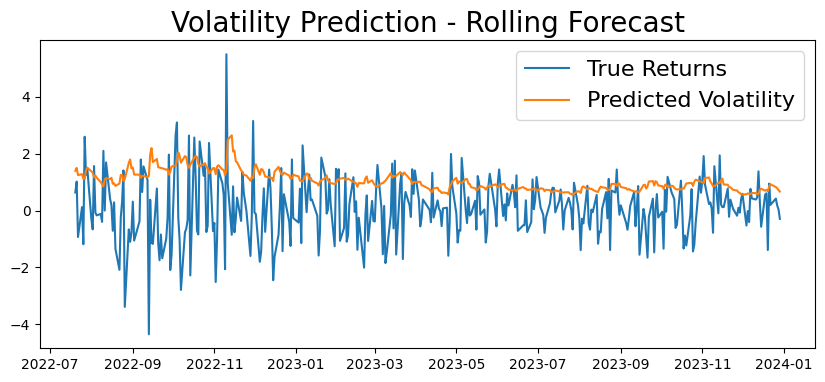

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Try GARCH(2,0) = ARCH(2)

In [16]:
model = arch_model(returns, p=2, q=0)

In [17]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 23419.361887263665
Iteration:      2,   Func. Count:     15,   Neg. LLF: 8146.2967403175135
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4622735.770407058
Iteration:      4,   Func. Count:     29,   Neg. LLF: 13696.780549815805
Iteration:      5,   Func. Count:     35,   Neg. LLF: 25454.42639698014
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4826.236170371174
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4757.9353240712635
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4754.289888458895
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4753.699144061156
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4753.584856769439
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4753.572746686398
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4753.570073279083
Iteration:     13,   Func. Count:     77,   Neg. LLF: 4753.570071401244
Iteration:     14,   Func. Count:     81,   Neg. LLF: 4753.5

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4753.57
Distribution:                  Normal   AIC:                           9515.14
Method:            Maximum Likelihood   BIC:                           9539.81
                                        No. Observations:                 3521
Date:                Fri, Mar 01 2024   Df Residuals:                     3520
Time:                        00:25:07   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0860  1.463e-02      5.882  4.055e-09 [5.737e-02,  0.115]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4543  3.134e-02     14.495  1.300e-47 [  0.393,  0.516]
alpha[1]       0.2739  4.373e-02      6.264  3.761e-10 [  0.188,  0.360]
alpha[2]       0.3640  4.060e-02      8.965  3.114e-19 [  0.284,  0.444]
========================================================================

Covariance estimator: robust
"""

In [19]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [20]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [21]:
print(rolling_predictions)

Date
2022-07-20    1.598265
2022-07-21    1.783203
2022-07-22    0.882357
2022-07-25    1.019494
2022-07-26    0.911492
                ...   
2023-12-22    1.203179
2023-12-26    0.854233
2023-12-27    0.700807
2023-12-28    0.706100
2023-12-29    0.677148
Length: 365, dtype: float64


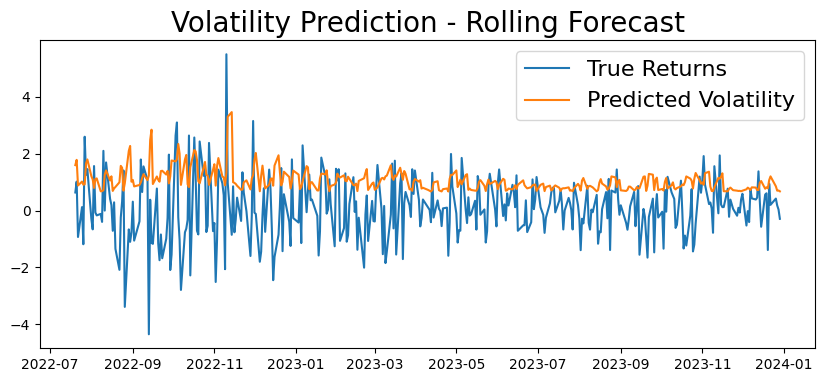

In [22]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model:

In [23]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [24]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [25]:
print(pred)

2023-12-30    0.640825
2023-12-31    0.654661
2024-01-01    0.676187
2024-01-02    0.690943
2024-01-03    0.708589
2024-01-04    0.722896
2024-01-05    0.738091
dtype: float64


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

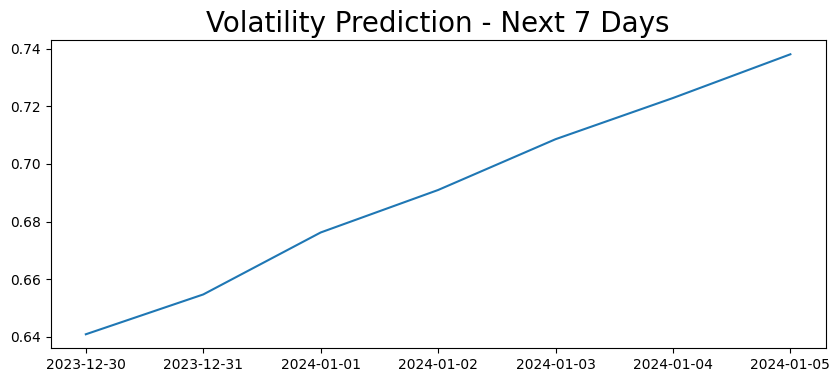

In [26]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)